# Eye Emotion Recognition

This analysis is about research and approach of image processing domain. The application mainly detects the human eyes (ROI) and then classify it into the desired human expressions.  

Facial coding performed to recognize consumer emotions towards products. The advantage
 of this application that we can recognize the consumer expressions, how's they are feeling
 and what emotions they have about specific product. 

##### Data Set and Data Preprocessing
Data set was downloaded from Kaggle.com. There were two folders, one is contained 270 training images and other one testing images contain 138 samples in the folder. Load the training images and store into variable train_x, with training labels into train_y. The length of labels was six, that contains six different human emotions. Similarly load the testing images and saved into the variable test_x and test_y, the length of those variables is 138 and 6 respectively. The type of the variables was list. Create the data frame function, convert the both labels into data frame by pd.DataFrame(). Plot the training dataset with label names and percentage of data distributed according to the emotions.

 

In [9]:
from tqdm import tqdm
import cv2
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.offline as offline
from plotly.subplots import make_subplots
import random
import pandas as pd
import numpy as np
import cv2
import os
import tensorflow
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import glob
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
from keras.layers import *
from keras.models import *
from keras.applications import *
from keras.optimizers import *
from keras.regularizers import *
from keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.models import *
from keras.applications import *
from keras.optimizers import *
from keras.regularizers import *

from keras.applications.inception_v3 import preprocess_input
offline.init_notebook_mode(connected = True)

In [11]:
# data directory
datadir = 'eye reaction last/train'
categories = ["anger","disgust","fear","happy","sad","surprise"] # emotions
noOfClasses = len(categories)

In [12]:
noOfClasses

6

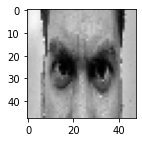

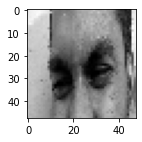

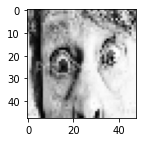

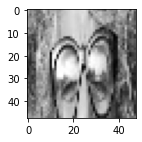

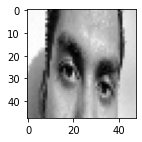

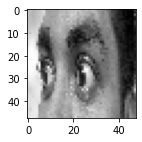

In [13]:
# empyty array
train_imgs = []
count = 0
for catg in categories:
    path = datadir+"/"+catg # path of All 6 Categories
    myPicList = os.listdir(path)
    for img in myPicList:
        #count = count+1
        # opencv function is used to read the current images
        curImg = cv2.imread(path+"/"+img, cv2.IMREAD_GRAYSCALE) # converted into grayscale Image
        curImg = cv2.resize(curImg, (48,48))
        train_imgs.append(curImg)
       # curImg = cv2.resize(curImg, (32,32))
        plt.figure(figsize=(2,2))
        plt.imshow(curImg,cmap="gray")
        plt.show()
        break

###### __Preparing The data set__

In [14]:
train_imgs[0].shape

(48, 48)

In [15]:
len(train_imgs)

6

In [16]:
# type of the Image is List array
type(train_imgs)

list

In [17]:
class Load_Datasets():
    def __init__(self,path="eye reaction last",size_images= (350,350),gray=False):
        self.path = path
        self.gray = gray
        self.size_images = size_images
    def load_images(self,p):
        images = []
        labels = []
        for emotion in tqdm(os.listdir(p)):
            new_p = os.path.join(p,emotion)
            for image in os.listdir(new_p):
                if self.gray:
                    image = cv2.imread(os.path.join(new_p,image),cv2.IMREAD_GRAYSCALE)
                    
                else:
                    image = cv2.imread(os.path.join(new_p,image))
                image = cv2.resize(image,self.size_images)
                images.append(image)
                labels.append(emotion)
        if self.gray:
            images = np.array(images)
            labels = np.array(labels)
            images = images.reshape(images.shape[0],images.shape[1]*images.shape[2])
            images = images.astype("float")/255
            
        return images,labels
    def load_data(self):
        for file in os.listdir(self.path):
            if file=="train":
                print("*"*100)
                print("Loading Training Dataset")
                train_path = os.path.join(self.path,"train")
                train_x,train_y = self.load_images(train_path)
            else:
                if file=="test":
                    print("*"*100)
                    print("Loading Testing Dataset")
                    test_path = os.path.join(self.path,"test")
                    test_x,test_y = self.load_images(test_path)
                else:
                    print("there is no train test folder")
        return train_x,train_y,test_x,test_y

In [18]:
data = Load_Datasets()
train_x,train_y,test_x,test_y = data.load_data()

****************************************************************************************************
Loading Testing Dataset


100%|██████████| 6/6 [00:02<00:00,  2.06it/s]


****************************************************************************************************
Loading Training Dataset


100%|██████████| 6/6 [00:03<00:00,  1.50it/s]


In [19]:
len(train_x)

270

In [20]:
len(test_y)

138

In [21]:
type(train_x)

list

In [22]:
def create_dataframe(train_y,test_y):
    dist = []
    df= pd.DataFrame()
    df_test= pd.DataFrame()
    df["labels"] = train_y
    df["Type"] = "train"
    df_test["labels"] = test_y
    df_test["Type"] = "test"
    df = df.append(df_test,ignore_index = True)
    return df
df = create_dataframe(train_y,test_y)



C:\Users\Abdullah\AppData\Local\Temp\ipykernel_16008\4158601472.py:9: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [23]:
type(train_x)

list

In [24]:
train = df[df["Type"]=="train"]
train_dist =  pd.DataFrame(train["labels"].value_counts() )
train_dist= train_dist.reset_index()

test = df[df["Type"]=="test"]
test_dist =  pd.DataFrame(test["labels"].value_counts() )
test_dist= test_dist.reset_index()



In [25]:
type(train_x)

list

In [26]:
def plot_data_distribution(data,label):
    fig = make_subplots(
        rows=1, cols=2,
        column_widths=[0.5, 0.5],
        row_heights=[0.5],
        specs=[[ {"type": "pie"}, {"type": "Funnelarea"}]])


    fig.add_trace(go.Pie(
        labels=data["index"], 
        values=data["labels"],
        legendgroup="group",
        textinfo='percent+label'), 
        row=1, col=1)

    fig.add_trace(go.Funnelarea(
       values=data['labels'], labels=data['index'], name='Emotions data distribution',
        title = {"position": "top center",}), 
                        row=1, col=2)

    fig.update_layout(height=500,width=1000, bargap=0.2,
                      margin=dict(b=0,r=20,l=20), xaxis=dict(tickmode='linear'),
                      title_text=f"{label} Data Distribution",
                      template="plotly_white",
                      title_font=dict(size=29, color='#8a8d93', family="Lato, sans-serif"),
                      font=dict(color='#8a8d93'), 
                      hoverlabel=dict(bgcolor="#f2f2f2", font_size=13, font_family="Lato, sans-serif"),
                      showlegend=False)
    fig.show()

In [27]:
plot_data_distribution(train_dist,"Training")


In [28]:
plot_data_distribution(test_dist,"Testing")

You can see in the figure the training data set images is equally distributed to 16.7% of each expression, however testing data set is unequally distributed. The highest dataset is of happy emotion which is 24.6% and lowest one is disgust 10.9%. 

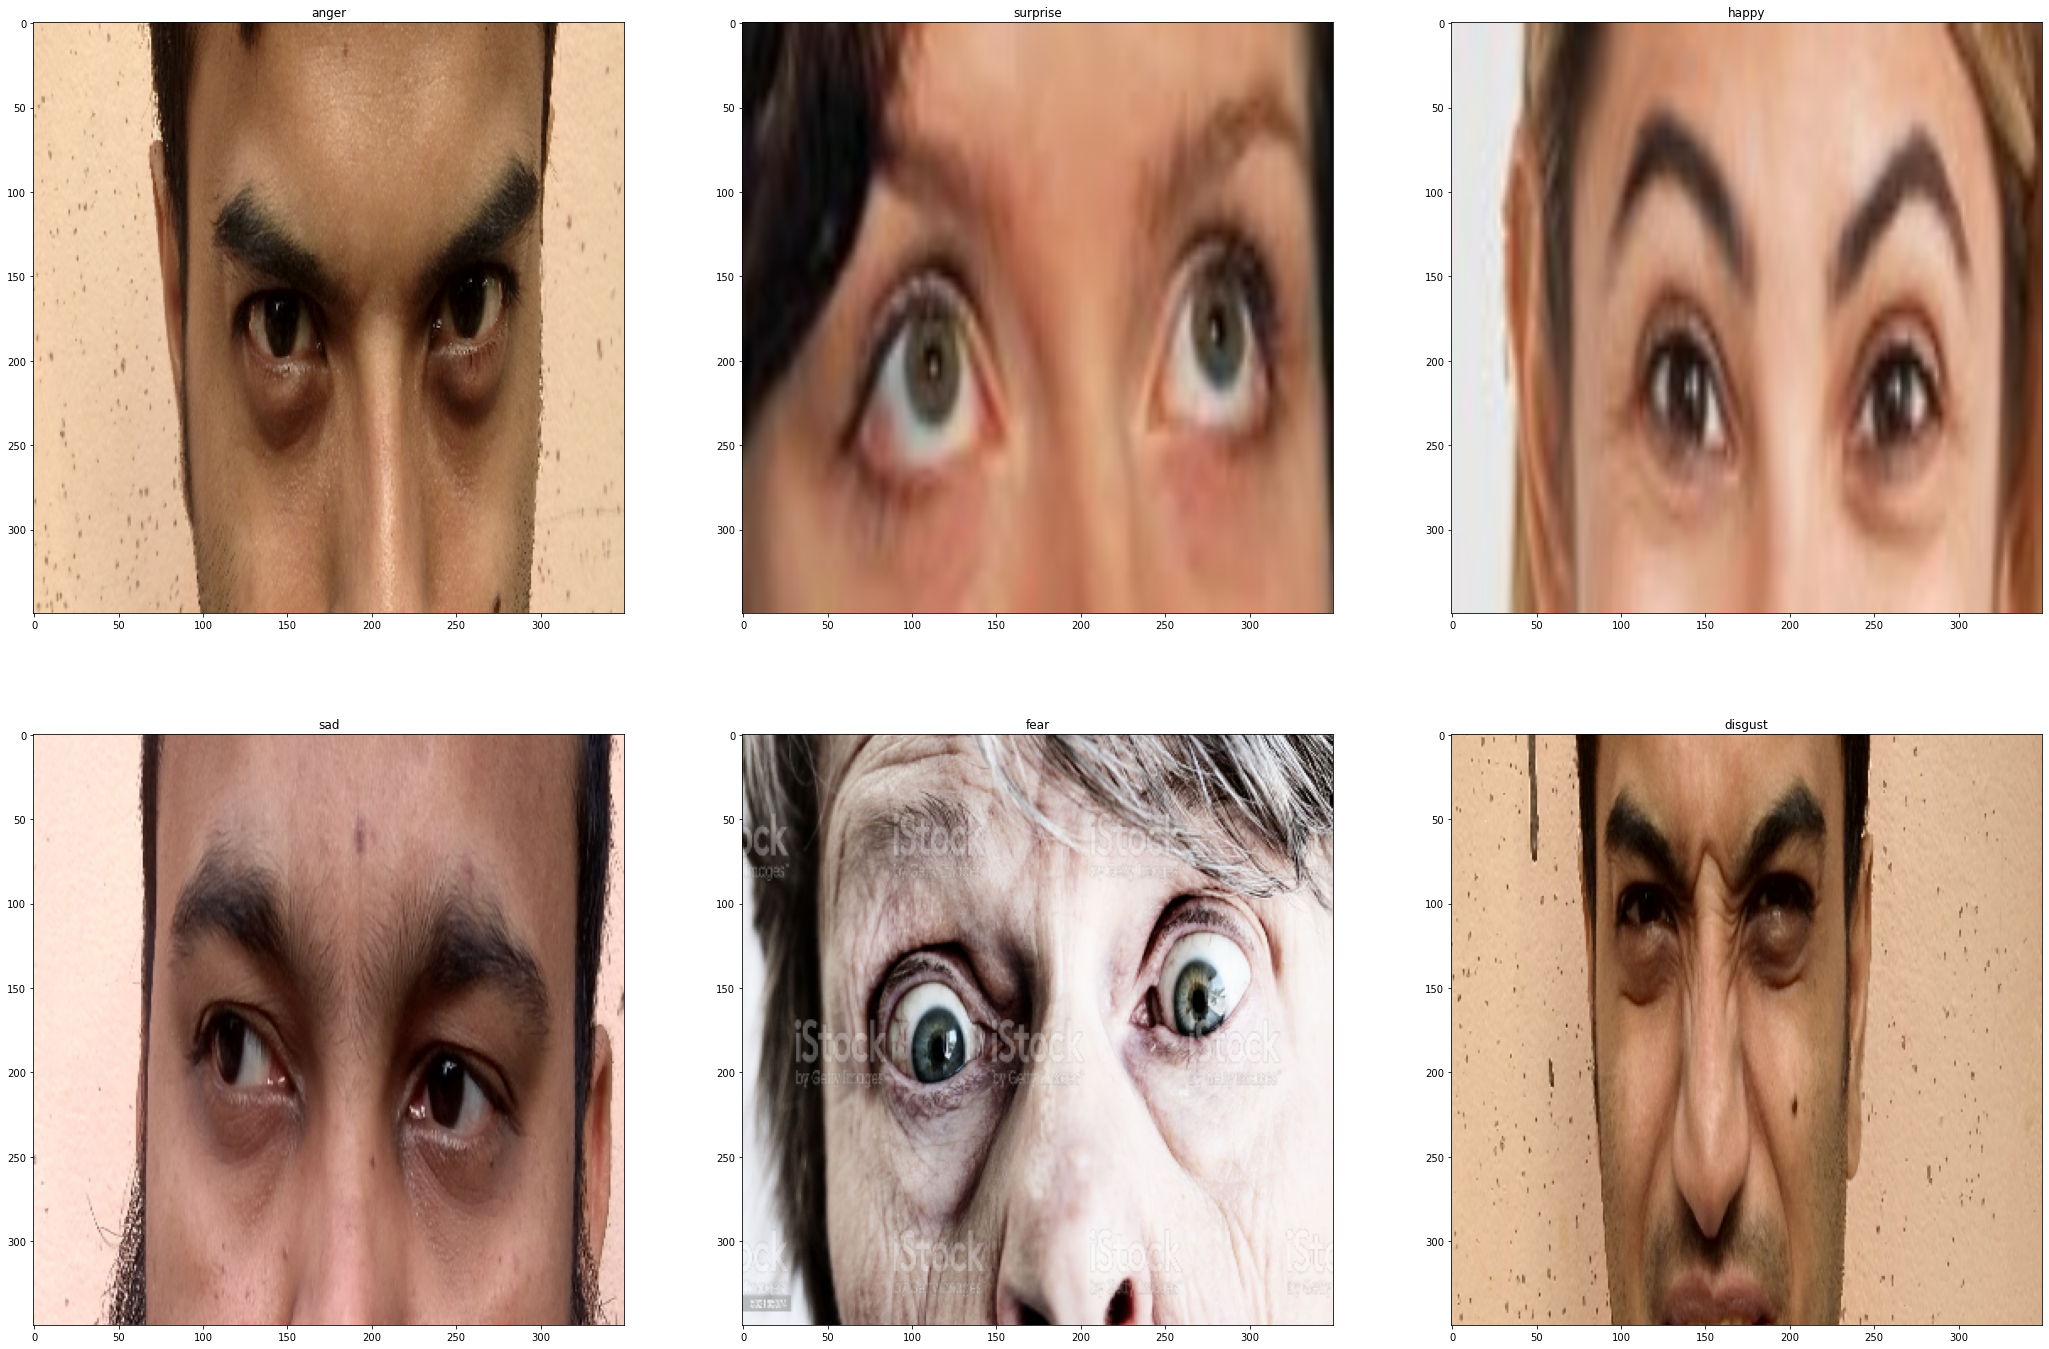

In [29]:
#TrainingImages
def get_random_unique_sample(images,labels):
    l = []
    imgs = []
    labels_array = np.array(labels)
    uniq = list(np.unique(labels_array))
    while len(l)!=len(uniq):
        r = random.randint(0,len(images)-1)
        unknown = labels[r]
        if unknown not in l:
            l.append(labels[r])
            imgs.append(images[r])
    del labels_array
    del uniq
    return  imgs,l
def show_images(images, rows = 1, titles = None):
    assert((titles is None) or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(int(rows),int( np.ceil(n_images/float(rows))), n +1)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
imgs,la = get_random_unique_sample(train_x,train_y)
show_images(imgs,titles=la,rows=2)

In [ ]:
train_y

In [ ]:
train_y = np.array(train_y)
train_y

## One Hot Encoding

The type of labels is list nonnumeric labels, to normalize the labels transformed nonnumeric labels into numeric labels, we converted into array form and then fit into label encoder to apply one hot encoding for processing categorical features for applying machine learning models. 

In [ ]:
train_y = np.array(train_y)
train_x = np.array(train_x)
test_y = np.array(test_y)
test_x = np.array(test_x)
encoder = LabelEncoder()
train_y = encoder.fit_transform(train_y) # transform non nemeric labels into numerical labels
train_y = to_categorical(train_y)
test_y = encoder.fit_transform(test_y)
test_y = to_categorical(test_y)



Features are extracted using deep learning model with pre-trained convolutional neural networks using the Keras library. The network is already trained on more than a million images from the imageNet dataset to train model inceptionV3 and exception. We extract features with both inceptionv3 and Xception model then concatenate both features. This is used for model optimization and improve the accuracy of the model. 
Build the CNN model with three dense layers. All layers used activation function RELU. Input shape was used 4096. In the first, second and third layer I used 1020, 900 and 800 filters respectively. Dropout layer was added with frequency rate 0.5 ideal for large networks, which helps prevent overfitting during the training process. Fourth dense layer is also added, that contains 6 neurons with activation function SoftMax. Model is compiling on optimizer Adaptive momentum estimation (Adam), loss function was used categorical cross entropy and metrics sets to accuracy. Initially the learning rate was set to LR = 0.001. Then fit the model, starts feature training with batch size was 5, total number of epochs was 22 and steps per epoch was 54. 


In [ ]:
def get_features(pr_model, data,width=350):
    cnn_model = pr_model(include_top=False, input_shape=(width, width, 3), weights='imagenet')
    
    inputs = Input((width, width, 3))
    x = inputs
    x = Lambda(preprocess_input, name='preprocessing')(x)
    x = cnn_model(x)
    x = GlobalAveragePooling2D()(x)
    cnn_model = Model(inputs, x)
    features = cnn_model.predict(data, batch_size=5, verbose=1)
    return features


In [ ]:
width =350
inception_features = get_features(InceptionV3, train_x)
xception_features = get_features(Xception,train_x)
features = np.concatenate([inception_features, xception_features],axis=1)


In [ ]:
features.shape

In [ ]:
model = Sequential()
model.add(layers.Dense(1020,activation= "relu",input_shape= (features.shape[1],)))
model.add(layers.Dense(900,activation = "relu"))
model.add(layers.Dense(800,activation="relu"))
model.add(Dropout(0.5))
#model.add(layers.Dense(700,activation="relu"))
model.add(layers.Dense(6,activation="softmax"))
model.compile(optimizer = "adam" ,loss = "categorical_crossentropy" , metrics = ["accuracy"])
history = model.fit(features,train_y,batch_size = 5,epochs = 22)


In [ ]:
inception_features = get_features(InceptionV3,test_x)
xception_features = get_features(Xception,test_x)
features_test = np.concatenate([inception_features, xception_features],axis=1)

Extract the testing features with pretrained convolutional network Inception_v3 and Xception model. Concatenate both features and save into the test feature variable. Evaluate the model accuracy through testing dataset and test labels. We got 72% accuracy of overall model. 

In [ ]:
eva = model.evaluate(features_test,test_y)

In [ ]:
history

In [ ]:
def diagnostic(history, filename=None):
    # Entropy Loss plot
    plt.figure(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.title('Cross Entropy Loss')
    plt.suptitle('Optimizer : Adam', fontsize=10)
    plt.ylabel('Loss', fontsize=16)
    plt.plot(history.history['loss'], label='Training Loss')
    #plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend(['train loss', 'validation loss'], loc ='best')

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.title('Classification Accuracy')
    plt.ylabel('Accuracy', fontsize=16)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
   # plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
    plt.show()
        

diagnostic(history)

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize = (20,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title("Model Loss",fontsize=20)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title("Model Accuracy",fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()

In [ ]:
pred = model.predict(features_test)
y_decode = np.argmax(pred,axis=1)
y_decode1 = encoder.inverse_transform(y_decode)


In [ ]:

#predicted Emotions
imgs,la = get_random_unique_sample(test_x,y_decode1)
show_images(imgs,titles=la,rows=2)



#### Re-Building Model Classification From ANN to show Difference between ANN and Inception+Exception


In [ ]:
data = Load_Datasets(gray=True)
x_train,y_train,x_test,y_test = data.load_data()
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(layers.Dense(1020,activation= "relu",input_shape= (x_train.shape[1],)))
model.add(layers.Dense(900,activation = "relu"))
model.add(layers.Dense(100,activation="relu"))
model.add(layers.Dense(200,activation="relu"))
model.add(layers.Dense(150,activation="relu"))
model.add(layers.Dense(50,activation="relu"))
model.add(layers.Dense(y_train.shape[1],activation="softmax"))
model.compile(optimizer = "adam" ,loss = "categorical_crossentropy" , metrics = ["accuracy"])

In [ ]:
model.fit(x_train,y_train,batch_size =5,epochs = 22,validation_split=0.1)

In [ ]:
loss,acc = model.evaluate(x_test,y_test, verbose=0)
print("         Using ANN           ")
print(f"loss on testing is {loss}\naccuracy on testing {acc}")